# HR Employee Attrition Analysis

**Author:** Shinin Varongchayakul

**Date:** 17 Feb 2025

**Language:** R

**Dataset:** IBM HR Analytics Employee Attrition & Performance

**From:** https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Business Questions
**Q1. Attrition Risk by Department & Role**
- We’ve been noticing an increase in employee turnover.
- Which departments and job roles have the highest attrition rates?

**Q2. Work-Life Balance & Overtime**
- Employees have expressed concerns about work-life balance.
- How does overtime impact attrition?
- Are employees who work overtime more likely to leave?

**Q3. Salary vs. Attrition: The Pay Gap Dilemma**
- Do employees who earn less tend to leave more frequently?
- What’s the average monthly income of those who stay vs. those who leave?
- Are we paying our high-performing employees enough to retain them?

**Q4. Age & Experience: Who is Most at Risk?**
- Are younger employees leaving at a higher rate than older employees?
- How does total working experience influence attrition?

**Q5. Promotion & Career Growth Opportunities**
- We want to ensure that employees see long-term career growth in our company.
- How does the number of promotions (YearsSinceLastPromotion) relate to attrition?
- Are employees with fewer promotions more likely to leave?

**Q6. Job Satisfaction vs. Attrition**
- How does job satisfaction affect attrition rates?
- Are employees with lower satisfaction scores leaving more often?

**Q7. Remote Work vs. Travel Frequency**
- With more employees requesting remote work, does business travel influence attrition?
- Are those who travel frequently more likely to leave?

**Q8. High Performers & Attrition**
- Are we losing our top-performing employees?
- How does Performance Rating relate to attrition?

## 1. Import & Load Libraries

In [ ]:
# Install
install.packages("tidyverse")

Warning message:
"package 'tidyverse' is in use and will not be installed"


Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [38]:
# Load
library(tidyverse)

## 2. Load the Dataset

In [40]:
# Load the dataset
hr <- read.csv("hr_employee_attrition_dataset.csv")

In [41]:
# Check the result
head(hr)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [42]:
# Glimpse the dataset
glimpse(hr)

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

I notice that the categorical columns need to be converted to factor.

## 3. Data Cleaning

In [43]:
# Make a copy of hr
hr_cleaned <- data.frame(hr)

### 3.1 Data Types

In [46]:
# Create a vector for columns to be casted as factor
factor_cols <- c("Attrition", "BusinessTravel","Department",
                    "Education", "EducationField", "Gender",
                    "JobLevel", "JobRole", "MaritalStatus",
                    "Over18", "OverTime", "StockOptionLevel")

# Convert the columns to factor
hr_cleaned <- hr_cleaned |>
                mutate(across(factor_cols, as.factor))

In [49]:
# Check the results
hr_cleaned |> 
    select(factor_cols) |>
    glimpse()

Rows: 1,470
Columns: 12
$ Attrition        <fct> Yes, No, Yes, No, No, No, No, No, No, No, No, No, No,…
$ BusinessTravel   <fct> Travel_Rarely, Travel_Frequently, Travel_Rarely, Trav…
$ Department       <fct> Sales, Research & Development, Research & Development…
$ Education        <fct> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, 4, 2, 2,…
$ EducationField   <fct> Life Sciences, Life Sciences, Other, Life Sciences, M…
$ Gender           <fct> Female, Male, Male, Female, Male, Male, Female, Male,…
$ JobLevel         <fct> 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1,…
$ JobRole          <fct> Sales Executive, Research Scientist, Laboratory Techn…
$ MaritalStatus    <fct> Single, Married, Single, Married, Married, Single, Ma…
$ Over18           <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y,…
$ OverTime         <fct> Yes, No, Yes, Yes, No, No, Yes, No, No, No, No, Yes, …
$ StockOptionLevel <fct> 0, 1, 0, 0, 1, 0, 3, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2,…


Twelve columns have been successfully converted to factor.

### 3.2 Missing Values

In [50]:
# Check if there are missing values
anyNA(hr_cleaned)

[1] FALSE

There appears to be no missing values.

## 4. Tackling the Business Questions

### Q1. Attrition Risk by Department & Role
- We’ve been noticing an increase in employee turnover.
- Which departments and job roles have the highest attrition rates?

`summarise()` has grouped output by 'Department'. You can override using the
`.groups` argument.


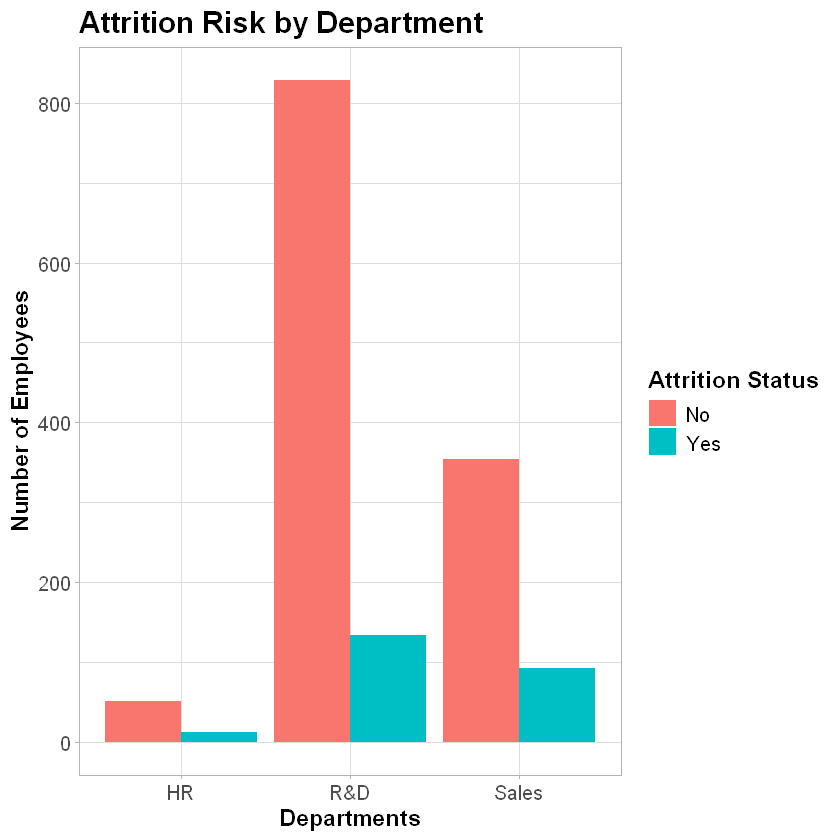

In [73]:
# Check the relationship between departments and attrition

## Count the number of "Yes" and "No" by `Department` and `Attrition`
hr_cleaned |>
    group_by(Department, Attrition) |>
    summarise(Count = n()) |>
    ungroup() |>

    ## Create a bar plot
    ggplot(aes(x = Department,
                y = Count,
                fill = Attrition)) +
        geom_bar(stat = "identity", position = "dodge") +
        theme_light() +
        theme(plot.title = element_text(size = 18, face = "bold"),
                axis.title = element_text(size = 14, face = "bold"),
                axis.text.x = element_text(size = 12),
                axis.text.y = element_text(size = 12),
                legend.title = element_text(size = 14, face = "bold"),
                legend.text = element_text(size = 12)) +
        scale_x_discrete(labels = c("Human Resources" = "HR", "Research & Development" = "R&D", "Sales" = "Sales")) +
        labs(title = "Attrition Risk by Department",
                x = "Departments",
                y = "Number of Employees",
                fill = "Attrition Status")

Based on the bar plot:
- R&D has the highest attrition risk and highest retention
- HR has the lowest attrition risk